# MLP
Mean RCI over 14 cell lines.

This notebook uses
lncRNA, canonical, no middle-exclusion train, yes middle-exclusion test, -1 threshold, learning module, cross-validation.

3rd random number trail

In [ ]:
SEED = 45
import tensorflow as tf
tf.random.set_seed(SEED) 
tf.keras.backend.set_floatx('float32')
import numpy as np
np.random.seed(SEED) 
from datetime import datetime
print(datetime.now())

2023-04-29 18:44:41.525162


In [ ]:
import sys
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

try:
    from google.colab import drive
    IN_COLAB = True
    print('Running on CoLab')
    PATH='/content/drive/'
    drive.mount(PATH)
    DATA_DIR=PATH+'My Drive/data/Localization/TrainTest/TrainTest_ver43/'  # must end in "/"
    MODEL_DIR=PATH+'My Drive/data/Localization/Models/'  # must end in "/"
    sys.path.append('/content/drive/My Drive/Colab Notebooks')
except:
    IN_COLAB = False
    DATA_DIR="/"
    MODEL_DIR="/"
print(DATA_DIR)
SAVE_MODEL_FILENAME = None # 'MLP'
SAVE_DESCRIM_FILENAME = None # 'GMM'
LOAD_MODEL_FILENAME = None # 'MLP.0.0.model'
LOAD_DESCRIM_FILENAME = None # 'GMM.0.0.pickle'

GPU device not found
Running on CoLab
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/


In [ ]:
from platform import python_version
print('Python',python_version())
import pandas as pd
import scipy.stats as ss
import pickle
import time # sleep function
from os.path import isfile
from matplotlib import pyplot as plt 
import sklearn   # pip install --upgrade scikit-learn
print('sklearn',sklearn.__version__)

from learning import DataLoader, CrossValidator, Separator, ModelBuilder

K=5
ALPHABET=4**K + 1
EPOCHS=300 
EMBED_DIMEN = 4 # arbitrary hyperparameter
RCI_THRESHOLD_MECHANISM = 'ZERO'   # 'RCI_GMM' 'ZERO' 'THE_MEAN'
RCI_THRESHOLD_VALUE = -1  # use -1 for lncRNA, use 0 for mRNA
BREAK = False   # optionally break after first fold
FILTER_TRAIN        = False
FILTER_TAILS_TRAIN  = False
FILTER_MIDDLE_TRAIN = False
FILTER_TEST         = True
FILTER_TAILS_TEST   = False
FILTER_MIDDLE_TEST  = True
MIDDLE_LOW          = -2   # -2 for lncRNA, -1 for mRNA
MIDDLE_HIGH         = 0    #  0 for lncRNA, +1 for mRNA

REPEATS = 2
FOLDS = 5

Python 3.10.11
sklearn 1.2.2


In [ ]:
RCI_FILE_TRAIN = 'train.lncRNA_RCI.all_cell_lines.csv'
RCI_FILE_TEST  = None # 'test.lncRNA_RCI.all_cell_lines.csv'

SEQ_FILE_TRAIN = 'train.canon_lncRNA_transcripts.csv'
SEQ_FILE_TEST  = None # 'test.canon_lncRNA_transcripts.csv'

In [ ]:
def get_ordered_list():
    ordered_list = \
    ['A549','H1.hESC','HeLa.S3','HepG2','HT1080',\
      'HUVEC','MCF.7','NCI.H460','NHEK','SK.MEL.5',\
      'SK.N.DZ','SK.N.SH','GM12878','K562','IMR.90']
    return ordered_list
all_cell_lines = get_ordered_list()
EXCLUSIONS = [1]  # H1.hESC   
print('Exclusions',EXCLUSIONS)

Exclusions [1]


In [ ]:
from tensorflow import keras
from keras import models
import pickle

def save_model(model, discriminator, filename1, filename2):
    filepath = MODEL_DIR + filename1
    model.save(filepath)
    print('Saved model 1 to',filepath)
    filepath = MODEL_DIR + filename2
    pickle.dump(discriminator, open(filepath, 'wb'))
    print('Saved model 2 to',filepath)

def load_model(filename1, filename2):
    filepath = MODEL_DIR + filename1
    model = keras.models.load_model(filepath)
    print('Loaded model 1 from',filepath)
    filepath = MODEL_DIR + filename2
    discriminator = pickle.load(open(filepath, 'rb'))        
    print('Loaded model 2 from',filepath)
    return model, discriminator
        

2023-04-29 18:44:43.825125
Load RCI from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.lncRNA_RCI.all_cell_lines.csv
Number of RCI values loaded 4372
Num RCI: 4372
Load sequence from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.canon_lncRNA_transcripts.csv
Loaded 4372 sequences.

Training # 1 1
2023-04-29 18:44:54.131661
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.1.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1810:1687 51.76%
Computed class weights: {0: 1.0364552459988146, 1: 0.9660220994475138}
Valid 1:0 259:273 48.68%
FIT


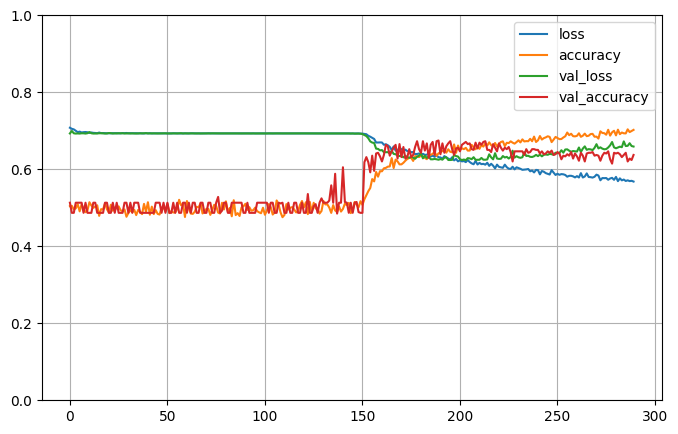


Testing # 1 1
2023-04-29 18:47:49.402215
PREDICT
Test 1:0 259:273 48.68%
Predict 1:0 258:274 48.50%
Test sizes (532, 1025) (532,)
Distrib of scores: 0.4946506 mean 0.16560599 std
Range of scores: 0.09923875 to 0.8705263
Score threshold 0.5
Confusion matrix
 [[187  86]
 [ 87 172]]
Normalized matrix
 [[0.35150376 0.16165414]
 [0.16353383 0.32330827]]
Extreme scores correct, pos:neg 78 90
Extreme scores incorrect pos:neg 33 26


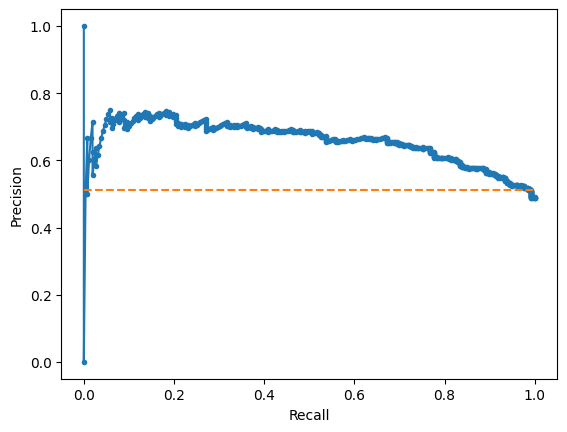

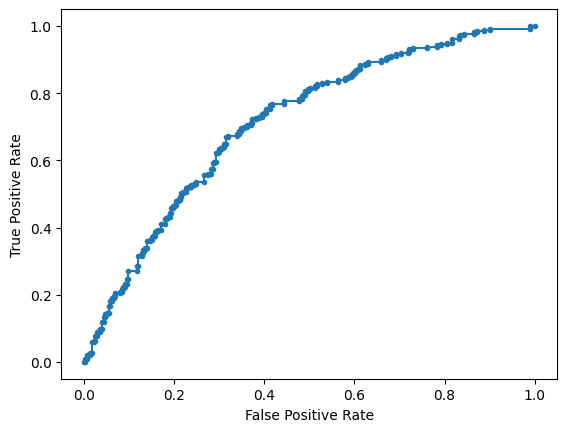

Accuracy: 67.48% Precision: 66.67% Recall: 66.41%
F1: 66.54% MCC: 0.3491
AUPRC: 65.61% AUROC: 71.22%
 accuracy [67.4812030075188]
 precision [66.66666666666666]
 recall [66.40926640926641]
 F1 [66.53771760154739]
 MCC [0.34911138181854406]
 AUPRC [65.60675402790974]
 AUROC [71.2164283592855]

Training # 1 2
2023-04-29 18:47:50.046125
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.2.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1789:1708 51.16%
Computed class weights: {0: 1.023711943793911, 1: 0.9773616545556176}
Valid 1:0 273:270 50.28%
FIT


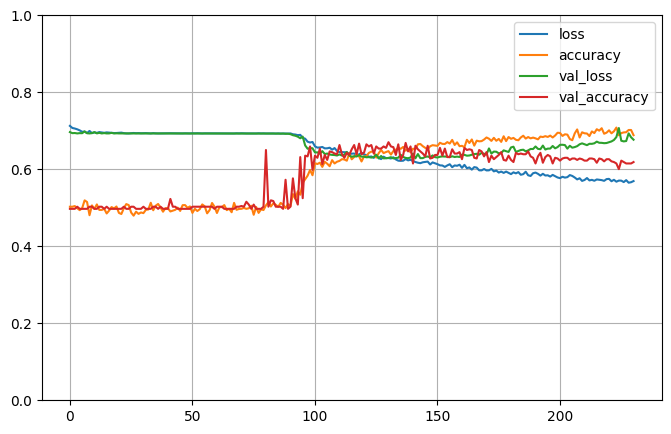


Testing # 1 2
2023-04-29 18:50:07.026412
PREDICT
Test 1:0 273:270 50.28%
Predict 1:0 320:223 58.93%
Test sizes (543, 1025) (543,)
Distrib of scores: 0.52369994 mean 0.15973403 std
Range of scores: 0.06929676 to 0.8657611
Score threshold 0.5
Confusion matrix
 [[157 113]
 [ 66 207]]
Normalized matrix
 [[0.28913444 0.20810313]
 [0.12154696 0.38121547]]
Extreme scores correct, pos:neg 85 69
Extreme scores incorrect pos:neg 40 12


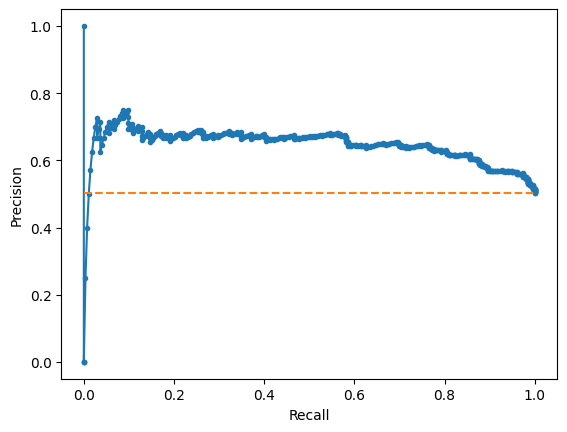

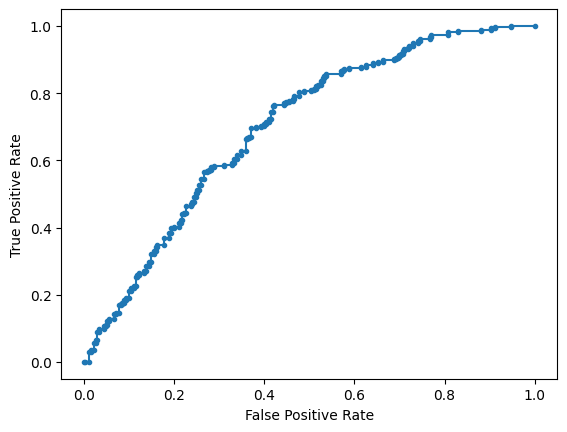

Accuracy: 67.03% Precision: 64.69% Recall: 75.82%
F1: 69.81% MCC: 0.3453
AUPRC: 64.62% AUROC: 69.98%
 accuracy [67.03499079189686]
 precision [64.6875]
 recall [75.82417582417582]
 F1 [69.81450252951096]
 MCC [0.34527174677156686]
 AUPRC [64.6232167952473]
 AUROC [69.97693664360331]

Training # 1 3
2023-04-29 18:50:07.812034
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.3.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1810:1688 51.74%
Computed class weights: {0: 1.036137440758294, 1: 0.9662983425414364}
Valid 1:0 251:256 49.51%
FIT


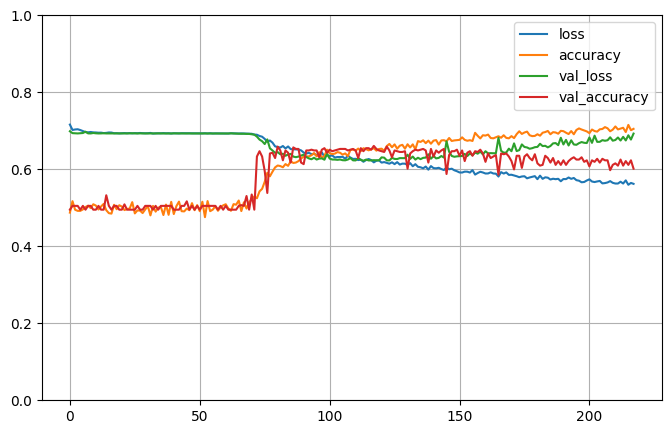


Testing # 1 3
2023-04-29 18:52:17.366206
PREDICT
Test 1:0 251:256 49.51%
Predict 1:0 293:214 57.79%
Test sizes (507, 1025) (507,)
Distrib of scores: 0.51851845 mean 0.16959593 std
Range of scores: 0.027064234 to 0.83446306
Score threshold 0.5
Confusion matrix
 [[149 107]
 [ 65 186]]
Normalized matrix
 [[0.2938856  0.21104536]
 [0.12820513 0.36686391]]
Extreme scores correct, pos:neg 81 71
Extreme scores incorrect pos:neg 40 17


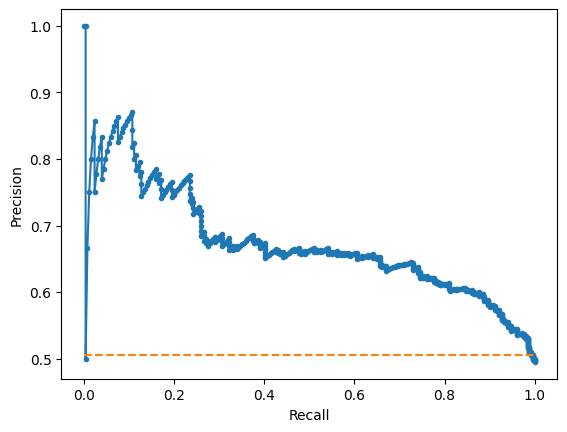

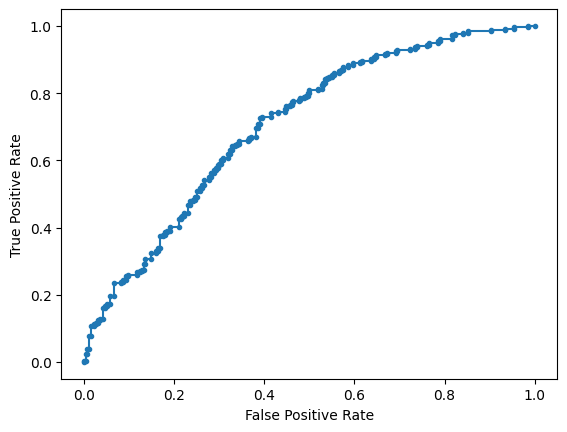

Accuracy: 66.07% Precision: 63.48% Recall: 74.10%
F1: 68.38% MCC: 0.3270
AUPRC: 67.27% AUROC: 70.56%
 accuracy [66.07495069033531]
 precision [63.48122866894198]
 recall [74.10358565737052]
 F1 [68.38235294117648]
 MCC [0.32704603529910986]
 AUPRC [67.27234689048318]
 AUROC [70.56150398406375]

Training # 1 4
2023-04-29 18:52:18.172990
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.4.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1778:1720 50.83%
Computed class weights: {0: 1.0168604651162791, 1: 0.9836895388076491}
Valid 1:0 257:245 51.20%
FIT


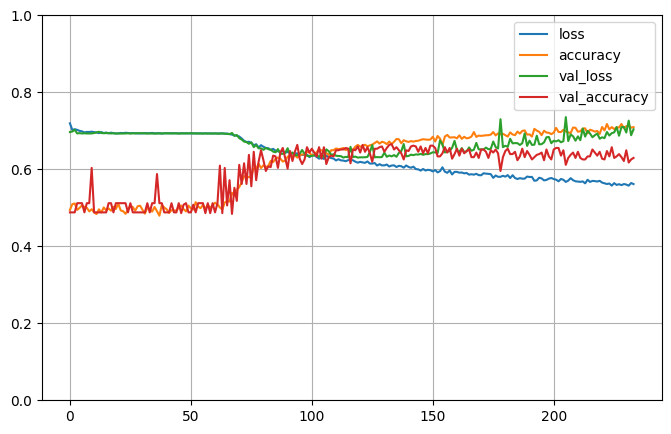


Testing # 1 4
2023-04-29 18:54:42.261935
PREDICT
Test 1:0 257:245 51.20%
Predict 1:0 249:253 49.60%
Test sizes (502, 1025) (502,)
Distrib of scores: 0.48815984 mean 0.18615597 std
Range of scores: 0.038659874 to 0.86409575
Score threshold 0.5
Confusion matrix
 [[165  80]
 [ 88 169]]
Normalized matrix
 [[0.32868526 0.15936255]
 [0.1752988  0.33665339]]
Extreme scores correct, pos:neg 81 86
Extreme scores incorrect pos:neg 27 32


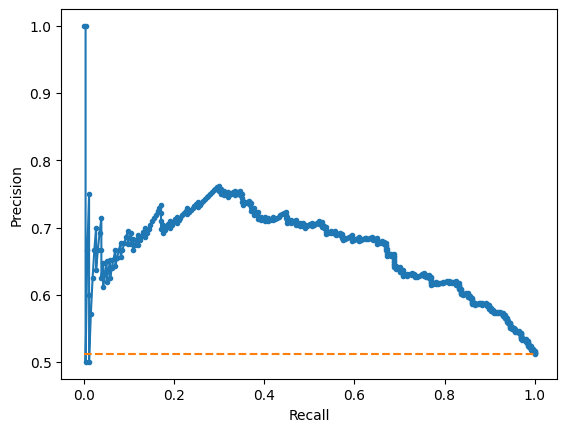

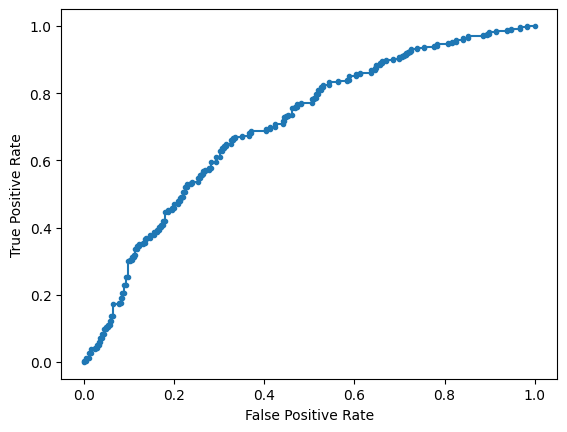

Accuracy: 66.53% Precision: 67.87% Recall: 65.76%
F1: 66.80% MCC: 0.3310
AUPRC: 66.91% AUROC: 70.21%
 accuracy [66.53386454183267]
 precision [67.8714859437751]
 recall [65.75875486381322]
 F1 [66.79841897233202]
 MCC [0.3309728437569368]
 AUPRC [66.91157224408718]
 AUROC [70.20566981656475]

Training # 1 5
2023-04-29 18:54:43.099259
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.5.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1785:1713 51.03%
Computed class weights: {0: 1.021015761821366, 1: 0.9798319327731092}
Valid 1:0 281:242 53.73%
FIT


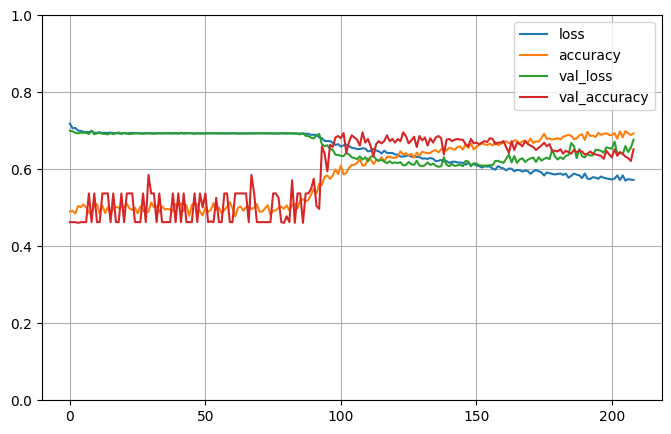


Testing # 1 5
2023-04-29 18:57:06.556191
PREDICT
Test 1:0 281:242 53.73%
Predict 1:0 294:229 56.21%
Test sizes (523, 1025) (523,)
Distrib of scores: 0.5285305 mean 0.12301825 std
Range of scores: 0.24268965 to 0.89148474
Score threshold 0.5
Confusion matrix
 [[156  86]
 [ 73 208]]
Normalized matrix
 [[0.29827916 0.16443595]
 [0.13957935 0.39770554]]
Extreme scores correct, pos:neg 68 28
Extreme scores incorrect pos:neg 22 3


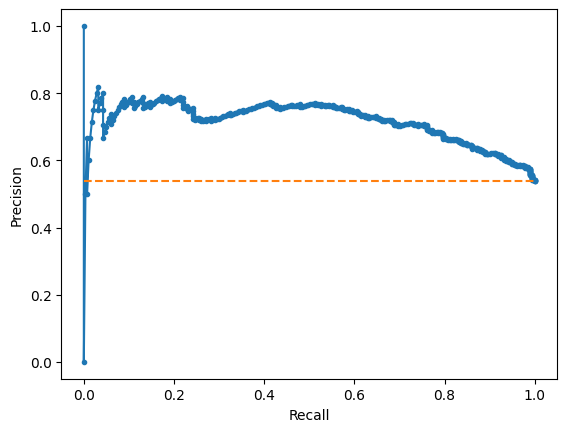

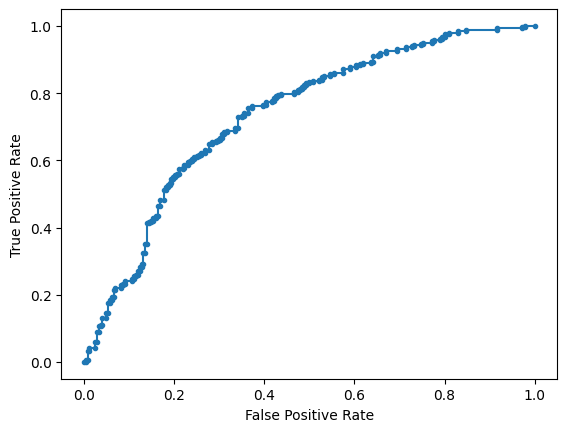

Accuracy: 69.60% Precision: 70.75% Recall: 74.02%
F1: 72.35% MCC: 0.3868
AUPRC: 71.57% AUROC: 73.50%
 accuracy [69.59847036328873]
 precision [70.74829931972789]
 recall [74.02135231316726]
 F1 [72.34782608695652]
 MCC [0.38676883590359407]
 AUPRC [71.5730390516542]
 AUROC [73.4963677538896]

Training # 2 1
2023-04-29 18:57:07.177145
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.1.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1807:1690 51.67%
Computed class weights: {0: 1.0346153846153847, 1: 0.9676258992805755}
Valid 1:0 261:256 50.48%
FIT


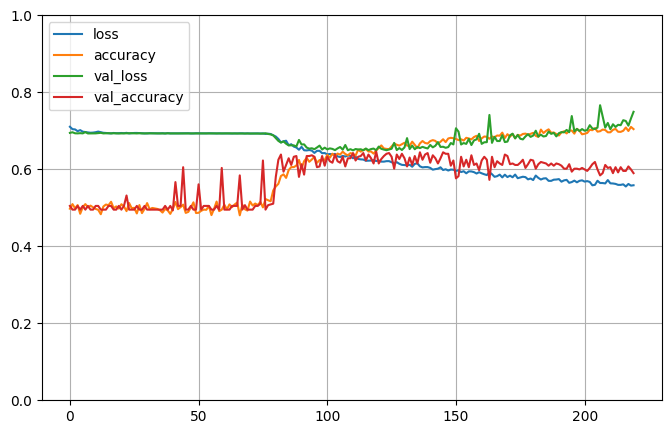


Testing # 2 1
2023-04-29 18:59:30.580442
PREDICT
Test 1:0 261:256 50.48%
Predict 1:0 266:251 51.45%
Test sizes (517, 1025) (517,)
Distrib of scores: 0.50021356 mean 0.17112663 std
Range of scores: 0.04535169 to 0.8711847
Score threshold 0.5
Confusion matrix
 [[162  94]
 [ 89 172]]
Normalized matrix
 [[0.31334623 0.18181818]
 [0.172147   0.33268859]]
Extreme scores correct, pos:neg 76 76
Extreme scores incorrect pos:neg 33 30


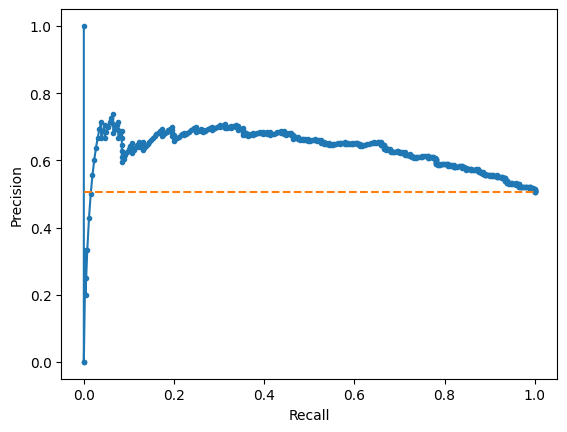

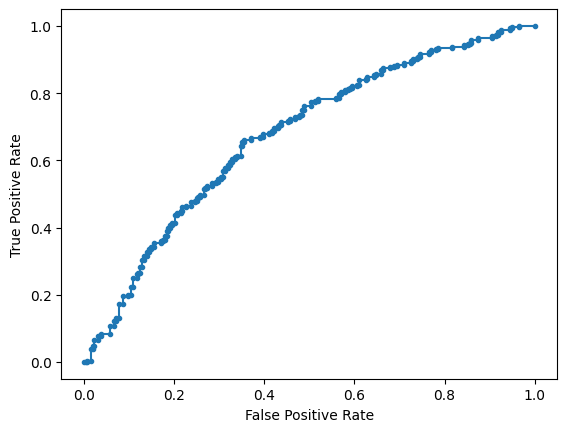

Accuracy: 64.60% Precision: 64.66% Recall: 65.90%
F1: 65.28% MCC: 0.2919
AUPRC: 63.34% AUROC: 67.43%
 accuracy [64.60348162475822]
 precision [64.66165413533834]
 recall [65.90038314176245]
 F1 [65.2751423149905]
 MCC [0.29192557928244645]
 AUPRC [63.33844524801548]
 AUROC [67.4314535440613]

Training # 2 2
2023-04-29 18:59:31.193424
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.2.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1794:1703 51.30%
Computed class weights: {0: 1.0267175572519085, 1: 0.9746376811594203}
Valid 1:0 278:258 51.87%
FIT


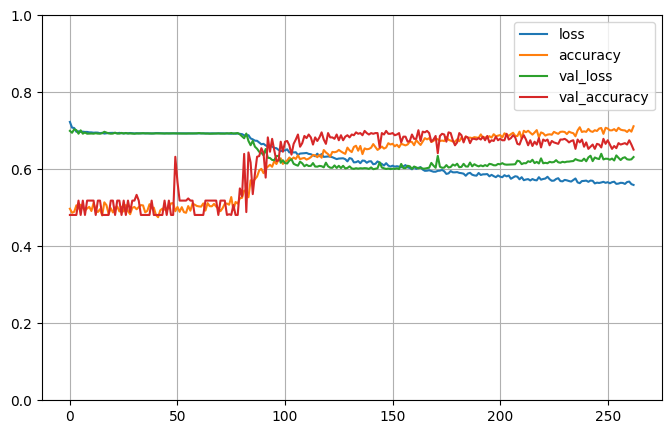


Testing # 2 2
2023-04-29 19:02:54.678359
PREDICT
Test 1:0 278:258 51.87%
Predict 1:0 320:216 59.70%
Test sizes (536, 1025) (536,)
Distrib of scores: 0.53390765 mean 0.19457935 std
Range of scores: 0.03947112 to 0.9062446
Score threshold 0.5
Confusion matrix
 [[157 101]
 [ 59 219]]
Normalized matrix
 [[0.29291045 0.18843284]
 [0.11007463 0.40858209]]
Extreme scores correct, pos:neg 126 82
Extreme scores incorrect pos:neg 41 20


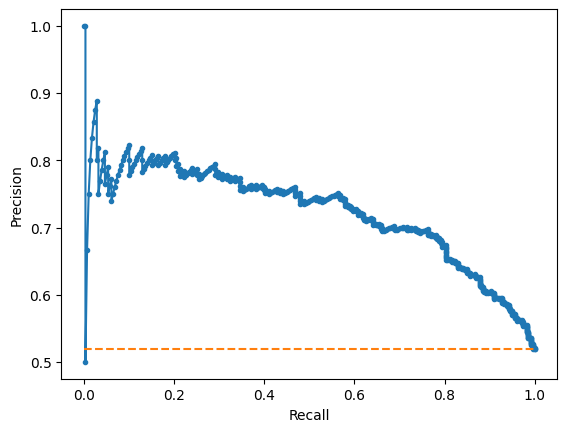

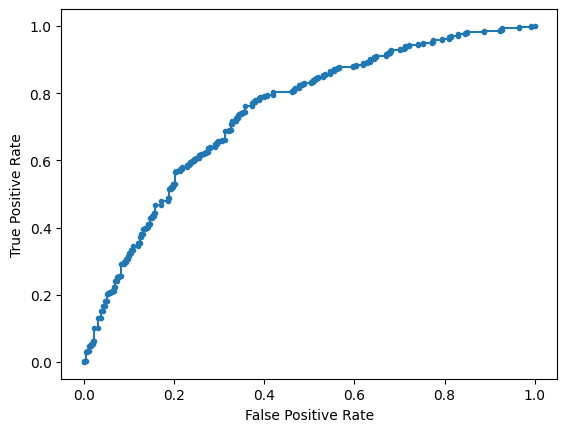

Accuracy: 70.15% Precision: 68.44% Recall: 78.78%
F1: 73.24% MCC: 0.4037
AUPRC: 72.34% AUROC: 74.27%
 accuracy [70.1492537313433]
 precision [68.4375]
 recall [78.77697841726618]
 F1 [73.24414715719062]
 MCC [0.40369286982435354]
 AUPRC [72.34109016115349]
 AUROC [74.2708159054152]

Training # 2 3
2023-04-29 19:02:55.641774
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.3.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1771:1727 50.63%
Computed class weights: {0: 1.0127388535031847, 1: 0.9875776397515528}
Valid 1:0 271:245 52.52%
FIT


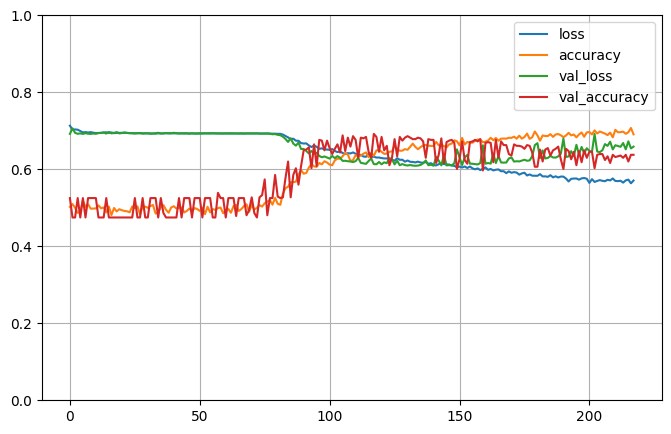


Testing # 2 3
2023-04-29 19:05:19.265562
PREDICT
Test 1:0 271:245 52.52%
Predict 1:0 302:214 58.53%
Test sizes (516, 1025) (516,)
Distrib of scores: 0.5224441 mean 0.15752785 std
Range of scores: 0.08313809 to 0.8250625
Score threshold 0.5
Confusion matrix
 [[150  95]
 [ 64 207]]
Normalized matrix
 [[0.29069767 0.18410853]
 [0.12403101 0.40116279]]
Extreme scores correct, pos:neg 81 68
Extreme scores incorrect pos:neg 36 9


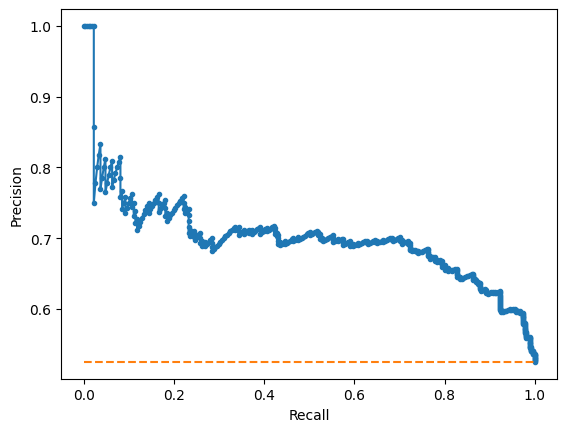

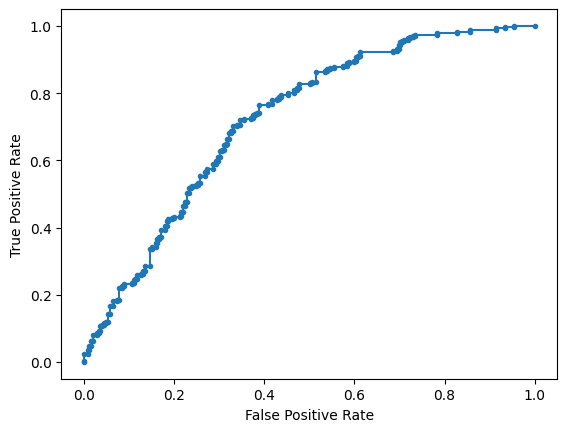

Accuracy: 69.19% Precision: 68.54% Recall: 76.38%
F1: 72.25% MCC: 0.3812
AUPRC: 70.05% AUROC: 72.24%
 accuracy [69.18604651162791]
 precision [68.54304635761589]
 recall [76.38376383763837]
 F1 [72.25130890052355]
 MCC [0.3811891201603693]
 AUPRC [70.04670378860396]
 AUROC [72.23586113412155]

Training # 2 4
2023-04-29 19:05:20.183518
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.4.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1816:1682 51.92%
Computed class weights: {0: 1.039833531510107, 1: 0.9631057268722467}
Valid 1:0 241:267 47.44%
FIT


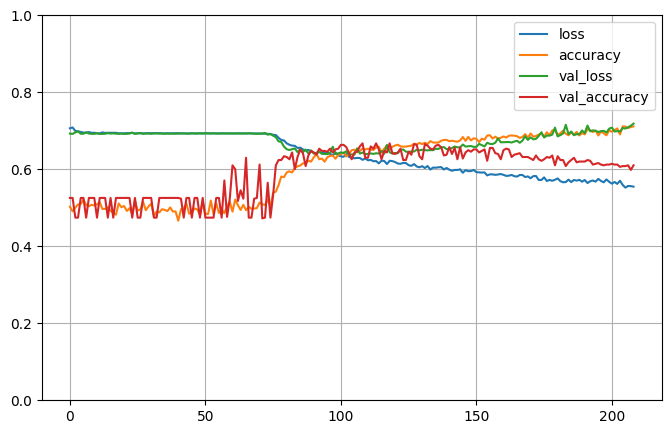


Testing # 2 4
2023-04-29 19:07:44.422274
PREDICT
Test 1:0 241:267 47.44%
Predict 1:0 290:218 57.09%
Test sizes (508, 1025) (508,)
Distrib of scores: 0.52443576 mean 0.16851348 std
Range of scores: 0.10071715 to 0.87533474
Score threshold 0.5
Confusion matrix
 [[158 109]
 [ 60 181]]
Normalized matrix
 [[0.31102362 0.21456693]
 [0.11811024 0.35629921]]
Extreme scores correct, pos:neg 90 67
Extreme scores incorrect pos:neg 46 20


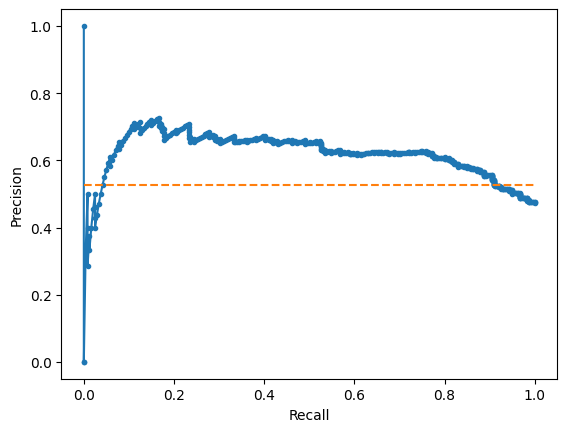

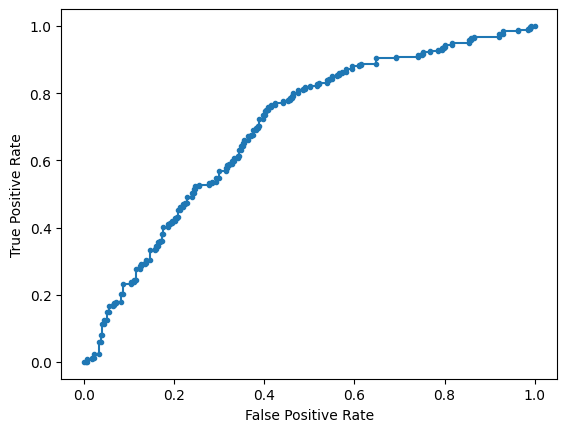

Accuracy: 66.73% Precision: 62.41% Recall: 75.10%
F1: 68.17% MCC: 0.3458
AUPRC: 61.82% AUROC: 69.62%
 accuracy [66.73228346456693]
 precision [62.41379310344828]
 recall [75.10373443983403]
 F1 [68.17325800376648]
 MCC [0.34583961150382714]
 AUPRC [61.824019801982686]
 AUROC [69.62406949818951]

Training # 2 5
2023-04-29 19:07:45.045237
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.5.validation_genes.txt
Discriminator ZERO -1
Train 1:0 1784:1714 51.00%
Computed class weights: {0: 1.0204200700116686, 1: 0.9803811659192825}
Valid 1:0 270:260 50.94%
FIT


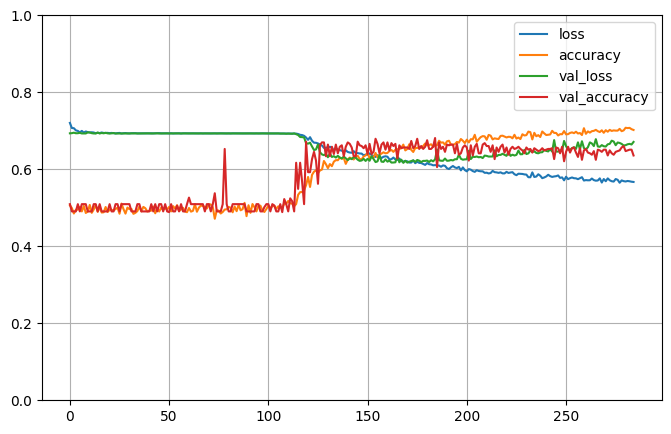


Testing # 2 5
2023-04-29 19:11:08.505894
PREDICT
Test 1:0 270:260 50.94%
Predict 1:0 347:183 65.47%
Test sizes (530, 1025) (530,)
Distrib of scores: 0.55788875 mean 0.17137621 std
Range of scores: 0.054283697 to 0.8871569
Score threshold 0.5
Confusion matrix
 [[137 123]
 [ 46 224]]
Normalized matrix
 [[0.25849057 0.23207547]
 [0.08679245 0.42264151]]
Extreme scores correct, pos:neg 119 51
Extreme scores incorrect pos:neg 46 16


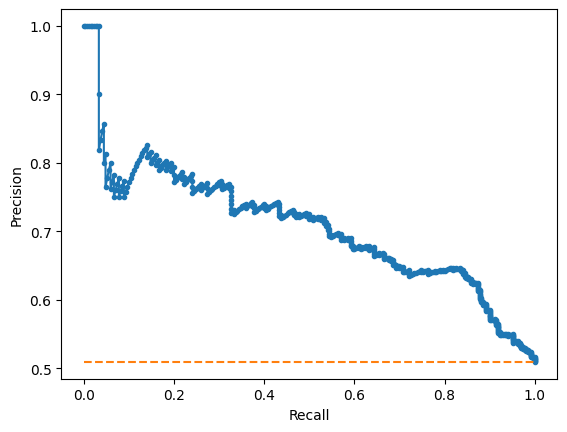

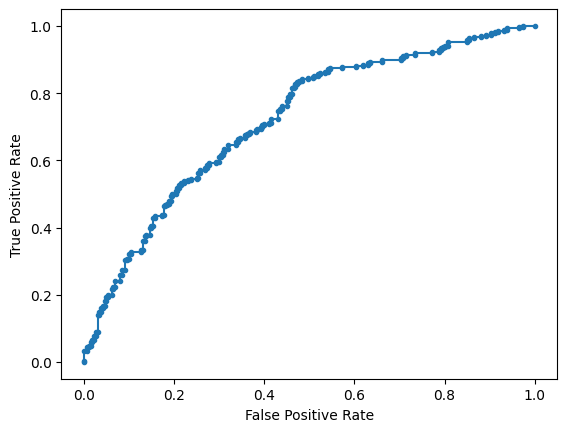

Accuracy: 68.11% Precision: 64.55% Recall: 82.96%
F1: 72.61% MCC: 0.3749
AUPRC: 70.77% AUROC: 71.92%
 accuracy [68.11320754716981]
 precision [64.55331412103746]
 recall [82.96296296296296]
 F1 [72.6094003241491]
 MCC [0.3748884076207774]
 AUPRC [70.77117687630137]
 AUROC [71.91595441595442]
2023-04-29 19:11:09.176205


In [ ]:
print(datetime.now())

accuracy=[]
precision=[]
recall=[]
f1=[]
mcc=[]
auprc=[]
auroc=[]

loader = DataLoader(K,ALPHABET)
filepath = DATA_DIR+RCI_FILE_TRAIN
print("Load RCI from",filepath)
gene_to_rci = loader.load_gene_rci_values(filepath,EXCLUSIONS)
print('Num RCI:', len(gene_to_rci.keys()))
filepath = DATA_DIR+SEQ_FILE_TRAIN
print('Load sequence from',filepath)
allids,allseq = loader.load_spectra(filepath)  # for MLP (load_sequence() for CNN)
print('Loaded',len(allseq),'sequences.')
test_gene_to_rci = None
test_allids = None
test_allseq = None
if SEQ_FILE_TEST is not None:
    # Train on the entire train set (no cross-validation).
    # Evaluate with the test files.
    test_loader = DataLoader(K,ALPHABET)
    filepath = DATA_DIR+RCI_FILE_TEST
    print("Load RCI from",filepath)
    test_gene_to_rci = test_loader.load_gene_rci_values(filepath,EXCLUSIONS)
    print('Num RCI:', len(test_gene_to_rci.keys()))
    filepath = DATA_DIR+SEQ_FILE_TEST
    print('Load sequence from',filepath)
    test_allids,test_allseq = test_loader.load_spectra(filepath)
    print('Loaded',len(test_allseq),'sequences.')

for repeat in range(REPEATS):
    for fold in range(FOLDS):
        show_r = repeat+1  # display one-based counting
        show_f = fold+1    # display one-based counting

        print()
        print("Training #",show_r,show_f)
        print(datetime.now())
        builder = ModelBuilder(ALPHABET)
        cvdo = CrossValidator(EPOCHS,RCI_THRESHOLD_VALUE)
        cvdo.set_model_builder(builder)
        cvdo.set_threshold_mechanism(RCI_THRESHOLD_MECHANISM)
        
        if SEQ_FILE_TEST is None:
            # Train on 80% and evaluate on 20%.
            separator = Separator()
            separator.set_middle(FILTER_TEST,FILTER_TAILS_TEST,FILTER_MIDDLE_TEST,\
                                 FILTER_TRAIN,FILTER_TAILS_TRAIN,FILTER_MIDDLE_TRAIN,\
                                 MIDDLE_LOW,MIDDLE_HIGH)
            separator.load(DATA_DIR,show_r,show_f)
            separator.process(allids,allseq,gene_to_rci)
            train_allids,test_allids = separator.get_ids()
            train_allseq,test_allseq = separator.get_seq()
            train_gene_to_rci,test_gene_to_rci = separator.get_rci()
            cvdo.train_new_model(
                train_allids,train_allseq,train_gene_to_rci,
                test_allids,test_allseq,test_gene_to_rci)
            if SAVE_MODEL_FILENAME is not None:
                filename1 = f"{SAVE_MODEL_FILENAME}.{show_r}.{show_f}.model"
                filename2 = f"{SAVE_DESCRIM_FILENAME}.{show_r}.{show_f}.pickle"
                model,discrim = cvdo.get_models()
                save_model(model,discrim,filename1,filename2)
        else:
            # Train on the entire train set (no cross-validation).
            # Evaluate with the test files.
            train_allids = allids
            train_allseq = allseq
            train_gene_to_rci = gene_to_rci
            BREAK = True
            if LOAD_MODEL_FILENAME is not None:
                filename1 = LOAD_MODEL_FILENAME
                filename2 = LOAD_DESCRIM_FILENAME
                model, descrim = load_model(filename1, filename2)
                cvdo.set_models(model, descrim)
            else:
                cvdo.train_new_model(
                    train_allids,train_allseq,train_gene_to_rci,
                    None,None,None)

        print()
        print("Testing #",show_r,show_f)
        print(datetime.now())
        cvdo.reset_statistics()
        cvdo.test_without_training(
            test_allids,test_allseq,test_gene_to_rci)
        cv_accuracy,cv_precision,cv_recall,cv_f1,cv_mcc,cv_auprc,cv_auroc=\
            cvdo.get_statistics()

        print(" accuracy" ,  cv_accuracy)
        print(" precision" , cv_precision)
        print(" recall" ,    cv_recall)
        print(" F1" ,        cv_f1)
        print(" MCC" ,       cv_mcc)
        print(" AUPRC" ,     cv_auprc)
        print(" AUROC" ,     cv_auroc)

        accuracy.append(cv_accuracy)
        precision.append(cv_precision)
        recall.append(cv_recall)
        f1.append(cv_f1)
        mcc.append(cv_mcc)
        auprc.append(cv_auprc)
        auroc.append(cv_auroc)
        if BREAK: break
    if BREAK: break
print(datetime.now())

In [ ]:
def STD (values):
    # ddof=1 reduces bias when extrapolating from sample to population
    return np.std(values,ddof=1)

print(" accuracy mean %.2f%% std %.2f" %  (np.mean(accuracy),  STD(accuracy)))
print(" precision mean %.2f%% std %.2f" % (np.mean(precision), STD(precision)))
print(" recall mean %.2f%% std %.2f" %    (np.mean(recall),    STD(recall)))
print(" F1 mean %.2f%% std %.2f" %        (np.mean(f1),        STD(f1)))
print(" MCC mean %.4f std %.4f" %       (np.mean(mcc),       STD(mcc)))
print(" AUPRC mean %.2f%% std %.2f" %     (np.mean(auprc),     STD(auprc)))
print(" AUROC mean %.2f%% std %.2f" %     (np.mean(auroc),     STD(auroc)))

print(" accuracy"  , accuracy)
print(" precision" , precision)
print(" recall"    , recall)
print(" F1"        , f1)
print(" MCC"       , mcc)
print(" AUPRC"     , auprc)
print(" AUROC"     , auroc)



 accuracy mean 67.55% std 1.72
 precision mean 66.21% std 2.65
 recall mean 73.52% std 5.80
 F1 mean 69.54% std 2.91
 MCC mean 0.3537 std 0.0333
 AUPRC mean 67.43% std 3.64
 AUROC mean 71.09% std 1.99
 accuracy [[67.4812030075188], [67.03499079189686], [66.07495069033531], [66.53386454183267], [69.59847036328873], [64.60348162475822], [70.1492537313433], [69.18604651162791], [66.73228346456693], [68.11320754716981]]
 precision [[66.66666666666666], [64.6875], [63.48122866894198], [67.8714859437751], [70.74829931972789], [64.66165413533834], [68.4375], [68.54304635761589], [62.41379310344828], [64.55331412103746]]
 recall [[66.40926640926641], [75.82417582417582], [74.10358565737052], [65.75875486381322], [74.02135231316726], [65.90038314176245], [78.77697841726618], [76.38376383763837], [75.10373443983403], [82.96296296296296]]
 F1 [[66.53771760154739], [69.81450252951096], [68.38235294117648], [66.79841897233202], [72.34782608695652], [65.2751423149905], [73.24414715719062], [72.25130